**Examples**

Cooling Tea

In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

Implementing Newtonian Cooling

In [3]:
def make_system(inital_temp, volume, r, t_end):
    return System(inital_temp=inital_temp,
                  T_final=inital_temp,
                  volume=volume,
                  r=r,
                  t_end=t_end,
                  T_env=25,
                  t_0=1,
                  dt=2)
Tea = make_system(inital_temp=80, volume=400, r=0.05, t_end=50)
def change_func(t, T, system):
    r, T_env, dt = system.r, system.T_env, system.dt
    return -r * (T - T_env) * dt
change_func(0, Tea.inital_temp, Tea)
def run_simulation(system, change_func):
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)

    series = TimeSeries(index=t_array)
    series.iloc[0] = system.inital_temp

    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)

    system.T_final = series.iloc[-1]
    return series
results = run_simulation(Tea, change_func)

In [4]:
show(results.head())

,Quantity
Time,
1.000000,80.0000
3.041667,74.5000
5.083333,69.5500
7.125000,65.0950
9.166667,61.0855


In [5]:
show(results.tail())

,Quantity
Time,
41.833333,31.686716
43.875000,31.018044
45.916667,30.416240
47.958333,29.874616
50.000000,29.387154


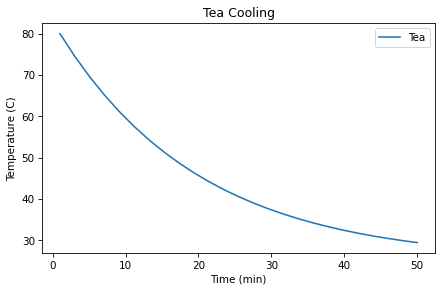

In [6]:
results.plot(label='Tea')
decorate(xlabel='Time (min)',
         ylabel='Temperature (C)',
         title='Tea Cooling')

In [7]:
Tea.T_final

29.387154369227993

Finding Roots

In [8]:
def func(x):
    return (x-4) * (x-1) * (x-3)
res = root_scalar(func, bracket=[2.5, 3.0])
res

      converged: True
           flag: converged
 function_calls: 2
     iterations: 0
           root: 3.0

In [9]:
res.root

3.0

In [10]:
res = root_scalar(func, bracket=[2.5, 3.5])
res.root

2.9999999459202713

Estimating r

In [13]:
def error_func(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 90
Tea = make_system(inital_temp=100, volume=500, r=0.07, t_end=60)
error_func(0.04, Tea)
error_func(0.03, Tea)
res = root_scalar(error_func, Tea, bracket=[0.04, -0.03])
res

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.002379338392924178

In [14]:
r_Tea = res.root
r_Tea

0.002379338392924178

In [15]:
Tea.r = res.root
run_simulation(Tea, change_func)
Tea.T_final

89.999985929496

**Exercises**

Exercise 1

In [16]:
milk_add = make_system(inital_temp=5, t_end=15, r=0.1, volume=50)
results_milk_add = run_simulation(milk_add, change_func)
milk_add.T_final

20.805696

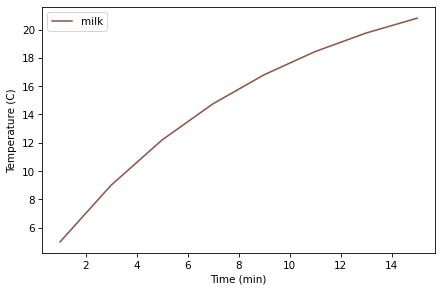

In [17]:
results_milk_add.plot(color='C5', label='milk')
decorate(xlabel='Time (min)',
         ylabel='Temperature (C)')

Exercise 2

In [19]:
def error_func(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 20
root_scalar(error_func, milk_add, bracket=[0.1, -0.2])
res

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.002379338392924178

In [20]:
run_simulation(milk_add, change_func)
milk_add.T_final

19.99963614387008